##FRUIT IDENTIFICATION

###Source Datasets

 https://www.kaggle.com/datasets/moltean/fruits

Dataset properties
The total number of images: 90483.

Training set size: 67692 images (one fruit or vegetable per image).

Test set size: 22688 images (one fruit or vegetable per image).

The number of classes: 131 (fruits and vegetables).

Image size: 100x100 pixels.

Filename format: image_index_100.jpg (e.g. 32_100.jpg) or r_image_index_100.jpg (e.g. r_32_100.jpg) or r2_image_index_100.jpg or r3_image_index_100.jpg. "r" stands for rotated fruit. "r2" means that the fruit was rotated around the 3rd axis. "100" comes from image size (100x100 pixels).


### Contest:
1. [Installation of the google drive](#0)
2. [Downloading datasets from Kaggle to google drive](#1)
3. [Import of libraries](#2)
4. [Load libraries](#3)
5. [Understanding data sets and problems](#4)
6. [Preparation of data sets](#5)
7. [Evolution of the data and prediction](#15)
8. [Testing the model prediction](#16)

### <a name='0'></a> Installation of the google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# mounting google drive

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### <a name='1'></a> Downloading datasets from Kaggle to google drive

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"


In [ ]:
%cd /content/drive/MyDrive/Kaggle

/content/drive/MyDrive/Kaggle


In [ ]:

import os

os.environ['KAGGLE_USERNAME'] = "xxxx" # username from the json file
os.environ['KAGGLE_KEY'] = "xxxxxxxxx" # key from the json file

!kaggle datasets download -d moltean/fruits

100% 1.28G/1.28G [00:19<00:00, 73.8MB/s]
100% 1.28G/1.28G [00:19<00:00, 72.5MB/s]


In [ ]:
 !unzip -uq "/content/drive/MyDrive/Kaggle/fruits.zip" -d "/content/drive/MyDrive/Kaggle/" # unzip file in google drive

In [ ]:
!unzip \*.zip && rm *.zips.zip

### <a name='2'></a> Import  of libraries

In [ ]:
!pip uninstall opencv-python

Found existing installation: opencv-python 4.7.0.72
Uninstalling opencv-python-4.7.0.72:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/cv2/*
    /usr/local/lib/python3.9/dist-packages/opencv_python-4.7.0.72.dist-info/*
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libQt5Core-39545cc7.so.5.15.0
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libQt5Gui-48e93776.so.5.15.0
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libQt5Test-c38a5234.so.5.15.0
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libQt5Widgets-e69d94fb.so.5.15.0
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libQt5XcbQpa-c112ba75.so.5.15.0
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libX11-xcb-69166bdf.so.1.0.0
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libavcodec-16a334ab.so.59.37.100
    /usr/local/lib/python3.9/di

In [ ]:
!pip install opencv-python==4.6.0.66

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 10.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.7.0.72
    Uninstalling opencv-python-4.7.0.72:
      Successfully uninstalled opencv-python-4.7.0.72


Save all requirements libraries in content

In [ ]:
#!pip freeze > requirements.txt

Install all required libraries from content folder in Colab after paste requirmetnts.txt file

In [ ]:
!pip install -r '/content/requirements.txt' # It works when you have clear colab

### <a name='3'></a>  Load libraries

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
import cv2
import imutils
from glob import glob # listnening names as pattern
from sklearn.model_selection import train_test_split
import imgaug.augmenters as iaa
from google.colab.patches import cv2_imshow
import plotly.express as px

print(f"Tensorflow {tf.__version__}")
print(f"Pandas {pd.__version__}")
print(f"Numpy {np.__version__}")
print(f"OpenCV-{cv2.__version__}")


print(os.path.abspath('.'))


Tensorflow 2.15.0
Pandas 1.5.3
Numpy 1.25.2
OpenCV-4.8.0
/content


### <a name='4'></a>  Understanding data sets and problems

###Image  - pre-analyse

In [ ]:
IMAGE_SIZE=100

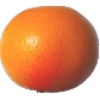

In [ ]:
path = "/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Test/Grapefruit Pink/100_100.jpg"
image = cv2.imread(path,1)
cv2_imshow(image)

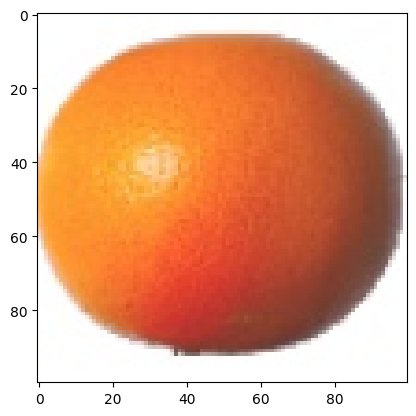

In [ ]:
filename = "/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Test/Grapefruit Pink/100_100.jpg"
car_img = cv2.imread(filename,1)
car_img=cv2.cvtColor(car_img, cv2.COLOR_BGR2RGB)
plt.imshow(car_img)

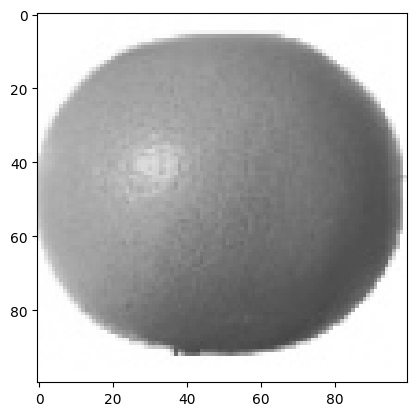

In [ ]:
gray = cv2.cvtColor(car_img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)

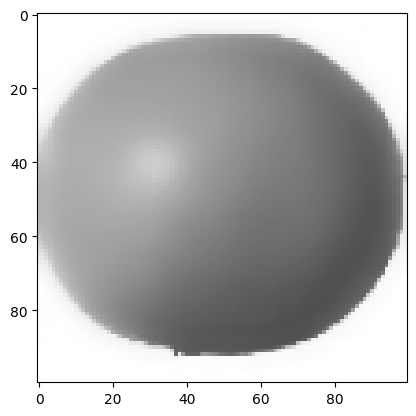

In [ ]:
blurred_gray = cv2.bilateralFilter(gray, 10, 50, 50)
plt.imshow(blurred_gray, cmap='gray', vmin=0, vmax=255)

(100, 100)


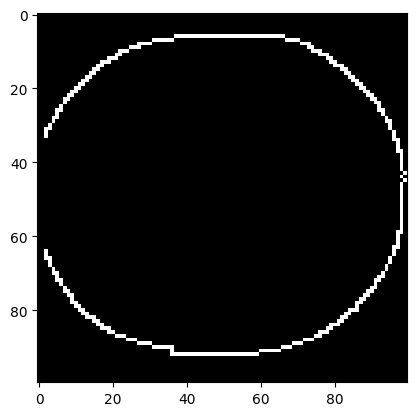

In [ ]:
edged = cv2.Canny(blurred_gray, 140, 200)
print(edged.shape)
plt.imshow(edged, cmap='gray', vmin=0, vmax=255)

Target information from labels.csv

In [ ]:
# Printing file names under the input directory
my_set=set()
for dir_name,_, file_names in os.walk('/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360'):
  for file_name in file_names:
    print(os.path.join(dir_name, file_name))



Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Training/Physalis with Husk/r_53_100.jpg
/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Training/Physalis with Husk/r_254_100.jpg
/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Training/Physalis with Husk/r_158_100.jpg
/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Training/Physalis with Husk/r_270_100.jpg
/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Training/Physalis with Husk/r_81_100.jpg
/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Training/Physalis with Husk/r_29_100.jpg
/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Training/Physalis with Husk/r_74_100.jpg
/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Training/Physalis with Husk/r_179_100.jpg
/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Training/Physalis with Husk/64_100.jpg
/content/drive/MyDrive/K

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Setting Training and Test dir paths

train_path='/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Training'
test_path='/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Test'

In [ ]:
from keras.preprocessing.image import load_img, img_to_array

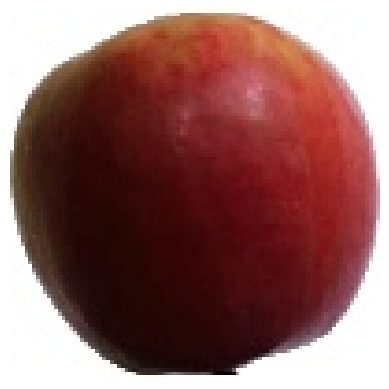

In [ ]:
# Displaying the image
image=load_img(train_path+'/Apple Crimson Snow/0_100.jpg', target_size=(100,100))
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
# Printing the shape of the image array
x=img_to_array(image)
print(x.shape)

(100, 100, 3)


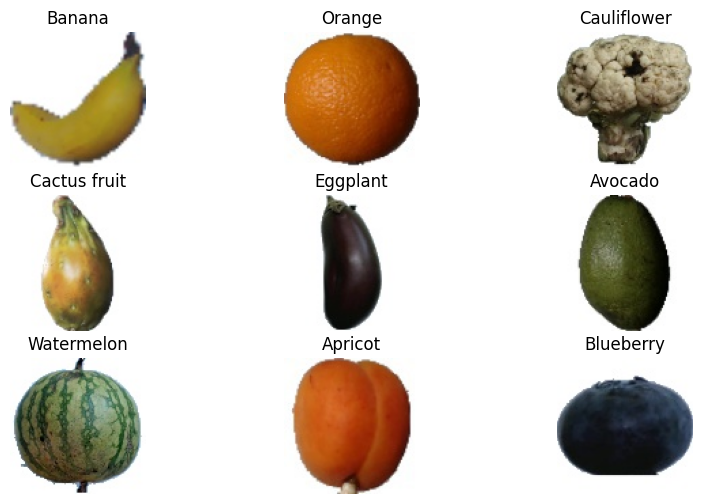

In [ ]:
# Image visualisation
images=['Banana','Orange','Cauliflower','Cactus fruit','Eggplant','Avocado','Watermelon','Apricot','Blueberry']
fig=plt.figure(figsize=(10,6))
for  i in range(len(images)):
  ax=fig.add_subplot(3,3,i+1)
  plt.axis('off')
  plt.title(images[i])
  ax.imshow(load_img(train_path+'/'+images[i]+'/0_100.jpg', target_size=(100,100)))

In [ ]:
# Count number of classes
className=glob(train_path+'/*')
number_of_classes=len(className)
print(number_of_classes)

131


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, Dense, MaxPooling2D, Flatten, Dropout

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), input_shape=x.shape)) # filter size =32, filter shape= 3x3
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_classes))
model.add( Activation('softmax'))


# Compiling model

model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 activation (Activation)     (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                   

In [ ]:
epochs=10  # number of iteration
batch_size=64

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:


train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.3, horizontal_flip=True, zoom_range=0.3, rotation_range=45)
test_datagen=ImageDataGenerator(rescale=1./255 )
train_generator=train_datagen.flow_from_directory(directory=train_path, target_size=x.shape[:2],
                                          batch_size=batch_size, color_mode='rgb', class_mode='categorical'      )
test_generator=test_datagen.flow_from_directory(directory=test_path, target_size=x.shape[:2],
                                          batch_size=batch_size, color_mode='rgb', class_mode='categorical'      )


Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [ ]:
hist=model.fit_generator(
    generator=train_generator,
    steps_per_epoch=1600 // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=800//batch_size


)

<ipython-input-23-021da54f8c3a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=model.fit_generator(


Epoch 1/10
25/25 [==============================] - 867s 35s/step - loss: 4.7959 - accuracy: 0.0144 - val_loss: 4.5421 - val_accuracy: 0.0469
Epoch 2/10
25/25 [==============================] - 826s 34s/step - loss: 4.3292 - accuracy: 0.0294 - val_loss: 4.1564 - val_accuracy: 0.0299
Epoch 3/10
25/25 [==============================] - 808s 33s/step - loss: 3.8522 - accuracy: 0.0806 - val_loss: 3.5579 - val_accuracy: 0.1237
Epoch 4/10
25/25 [==============================] - 808s 33s/step - loss: 3.5434 - accuracy: 0.1006 - val_loss: 2.9646 - val_accuracy: 0.2383
Epoch 5/10
25/25 [==============================] - 771s 31s/step - loss: 3.2420 - accuracy: 0.1506 - val_loss: 2.6981 - val_accuracy: 0.3333
Epoch 6/10
25/25 [==============================] - 778s 32s/step - loss: 2.9869 - accuracy: 0.1869 - val_loss: 2.5103 - val_accuracy: 0.3333
Epoch 7/10
25/25 [==============================] - 720s 29s/step - loss: 2.6594 - accuracy: 0.2406 - val_loss: 2.0886 - val_accuracy: 0.4154
Epoch 

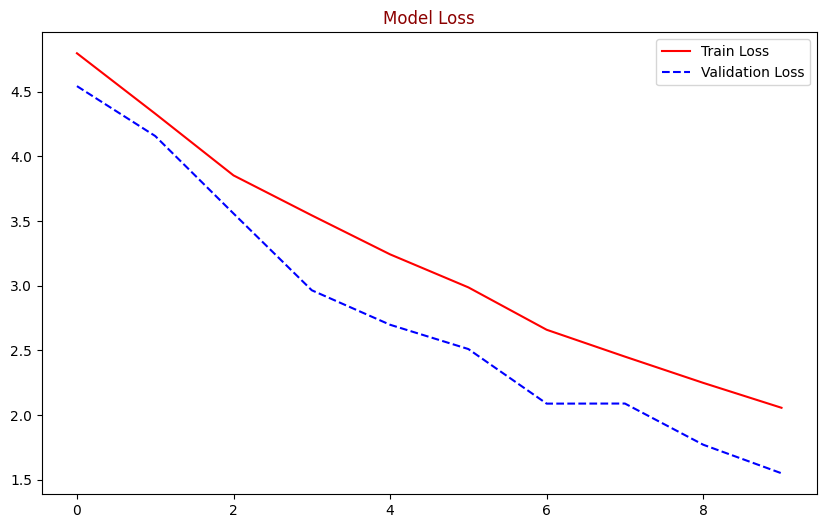

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'],label='Train Loss', color='red' )
plt.plot(hist.history['val_loss'],label='Validation Loss', color='blue', linestyle='--')
plt.title('Model Loss',color="darkred", size=12)
plt.legend()
plt.show()

Prediction testing

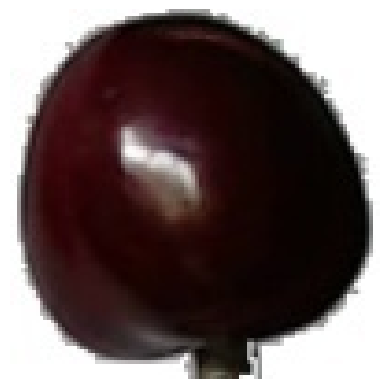

In [ ]:
from PIL import Image

img=load_img(test_path+"/Cherry 1/321_100.jpg", target_size=(100, 100))
plt.imshow(img)
plt.axis('off')
plt.show()

def load(file_name):
  np_image=Image.open(file_name)
  np_image=np.array(np_image).astype('float32')/255
  np_image=np.expand_dims(np_image, axis=0)
  return np_image



In [ ]:
image=load(test_path+"/Cherry 1/321_100.jpg")
image.shape

(1, 100, 100, 3)

In [ ]:
prediction=np.argmax(model.predict(image), axis=-1)
print(prediction)

1/1 [==============================] - 0s 409ms/step
[26]


In [ ]:
{'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Beetroot': 19, 'Blueberry': 20, 'Cactus fruit': 21, 'Cantaloupe 1': 22, 'Cantaloupe 2': 23, 'Carambula': 24, 'Cauliflower': 25, 'Cherry 1': 26, 'Cherry 2': 27, 'Cherry Rainier': 28, 'Cherry Wax Black': 29, 'Cherry Wax Red': 30, 'Cherry Wax Yellow': 31, 'Chestnut': 32, 'Clementine': 33, 'Cocos': 34, 'Corn': 35, 'Corn Husk': 36, 'Cucumber Ripe': 37, 'Cucumber Ripe 2': 38, 'Dates': 39, 'Eggplant': 40, 'Fig': 41, 'Ginger Root': 42, 'Granadilla': 43, 'Grape Blue': 44, 'Grape Pink': 45, 'Grape White': 46, 'Grape White 2': 47, 'Grape White 3': 48, 'Grape White 4': 49, 'Grapefruit Pink': 50, 'Grapefruit White': 51, 'Guava': 52, 'Hazelnut': 53, 'Huckleberry': 54, 'Kaki': 55, 'Kiwi': 56, 'Kohlrabi': 57, 'Kumquats': 58, 'Lemon': 59, 'Lemon Meyer': 60, 'Limes': 61, 'Lychee': 62, 'Mandarine': 63, 'Mango': 64, 'Mango Red': 65, 'Mangostan': 66, 'Maracuja': 67, 'Melon Piel de Sapo': 68, 'Mulberry': 69, 'Nectarine': 70, 'Nectarine Flat': 71, 'Nut Forest': 72, 'Nut Pecan': 73, 'Onion Red': 74, 'Onion Red Peeled': 75, 'Onion White': 76, 'Orange': 77, 'Papaya': 78, 'Passion Fruit': 79, 'Peach': 80, 'Peach 2': 81, 'Peach Flat': 82, 'Pear': 83, 'Pear 2': 84, 'Pear Abate': 85, 'Pear Forelle': 86, 'Pear Kaiser': 87, 'Pear Monster': 88, 'Pear Red': 89, 'Pear Stone': 90, 'Pear Williams': 91, 'Pepino': 92, 'Pepper Green': 93, 'Pepper Orange': 94, 'Pepper Red': 95, 'Pepper Yellow': 96, 'Physalis': 97, 'Physalis with Husk': 98, 'Pineapple': 99, 'Pineapple Mini': 100, 'Pitahaya Red': 101, 'Plum': 102, 'Plum 2': 103, 'Plum 3': 104, 'Pomegranate': 105, 'Pomelo Sweetie': 106, 'Potato Red': 107, 'Potato Red Washed': 108, 'Potato Sweet': 109, 'Potato White': 110, 'Quince': 111, 'Rambutan': 112, 'Raspberry': 113, 'Redcurrant': 114, 'Salak': 115, 'Strawberry': 116, 'Strawberry Wedge': 117, 'Tamarillo': 118, 'Tangelo': 119, 'Tomato 1': 120, 'Tomato 2': 121, 'Tomato 3': 122, 'Tomato 4': 123, 'Tomato Cherry Red': 124, 'Tomato Heart': 125, 'Tomato Maroon': 126, 'Tomato Yellow': 127, 'Tomato not Ripened': 128, 'Walnut': 129, 'Watermelon': 130}